# read image

In [50]:
import cv2
imgtest = cv2.imread(r"C:\Users\nguye\OneDrive\code_anything\computerVision\Image-Processing-20222\test.jpg")
image1 = cv2.imread(r"F:\slide\20222\xla\Image4Project\text1.png")
# gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
image2 = cv2.imread(r"F:\slide\20222\xla\Image4Project\text2.png")
image3 = cv2.imread(r"F:\slide\20222\xla\Image4Project\text3.png")

# plt.imshow(gray3, cmap='gray')

# suitable parameter for best result in image 1

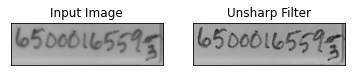

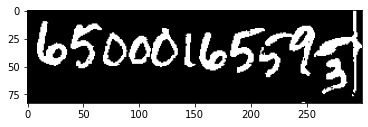

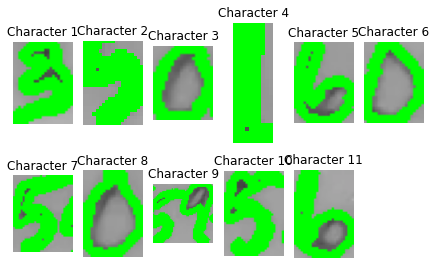

-1

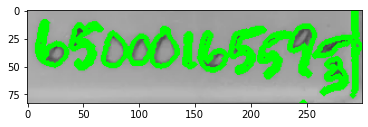

In [49]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
import cv2

# Convert 'image' to PIL Image
image = Image.fromarray(image1.astype('uint8'))

# Apply Unsharp Mask filter
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

# Convert 'new_image' to grayscale numpy array
new_image_gray = new_image.convert('L')
new_image_np = np.array(new_image_gray)

# Display the images using matplotlib
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

#Apply thresholding
thresh = cv2.threshold(new_image_np, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap='gray')
plt.show()

#find and draw contours
contours2, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image1, contours2, -1, (0, 255, 0), 3)
  
cv2.imshow('Contours', image1)
cv2.waitKey(0)

#split characters by contours
characters = []
for contour in contours2:
    (x, y, w, h) = cv2.boundingRect(contour)
    cv2.rectangle(image2, (x, y), (x + w, y + h), (36,255,12), 1)
    aspect_ratio = w / float(h)
#filter out the inappropriate
    if h < 25 or h>60 :
        continue

    character = image1[y:y+h, x:x+w]
    characters.append(character)


#show each character
for i, character in enumerate(characters):
    cv2.imwrite(f'character_{i+1}.png', character)
    plt.subplot(2, len(characters)//2 + 1, i+1)
    plt.imshow(cv2.cvtColor(character, cv2.COLOR_BGR2RGB))
    plt.title("Character {}".format(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.imshow(image1, cmap='gray')
cv2.waitKey(0)

# suitable parameter for best result in image 2,3 

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.filters import unsharp_mask

def split_characters(img):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Unsharp Mask filter
    new_image = unsharp_mask(img_gray, radius=20, amount=1)

    # Convert image to 8-bit unsigned integer
    new_image = (new_image * 255).astype(np.uint8)

    # Threshold the grayscale image
    _, thresh = cv2.threshold(new_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    img_contours = img.copy()
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
    cv2.imshow('Contours', img)
    cv2.waitKey(0)

    #Split each character by contours
    characters = []
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
    ##filter out the inappropriate
        if h < 30:
            continue
        character = img[y:y+h, x:x+w]
        characters.append(character)

    plt.figure(figsize=(12, 6))

    # Display original image with contours
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Contours")
    plt.axis('off')

    # Display individual characters
    for i, character in enumerate(characters):
        cv2.imwrite(f'character_{i+1}.png', character)
        plt.subplot(2, len(characters)//2 + 1, i+1)
        plt.imshow(cv2.cvtColor(character, cv2.COLOR_BGR2RGB))
        plt.title("Character {}".format(i+1))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

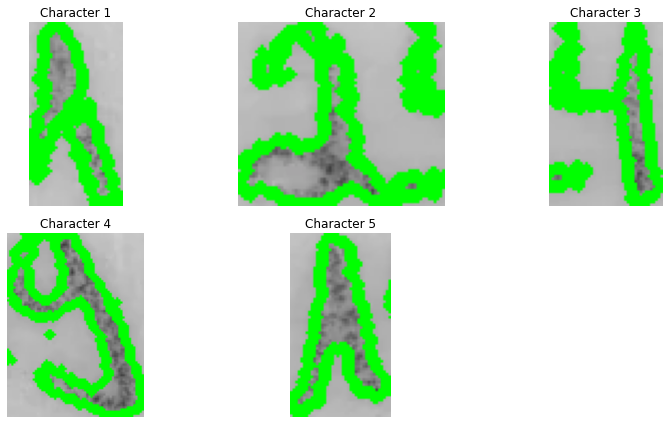

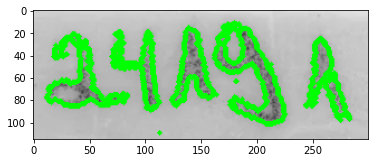

In [52]:
split_characters(image2)
plt.imshow(image2, cmap='gray')

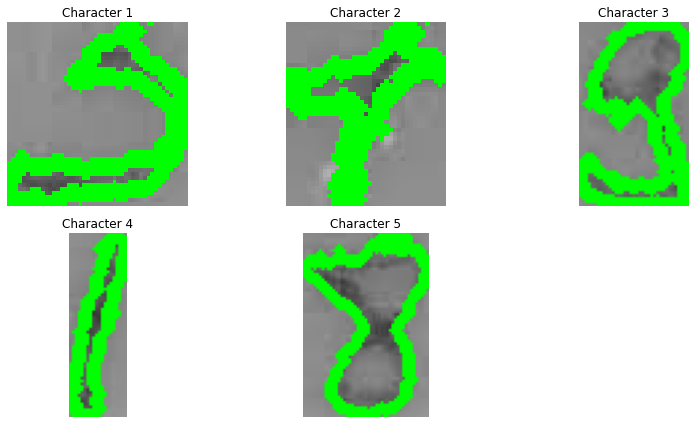

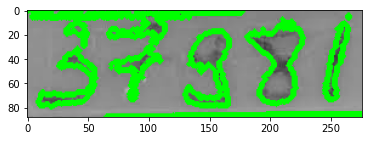

In [53]:
split_characters(image3)
plt.imshow(image3, cmap='gray')